<a href="https://colab.research.google.com/github/suhaila703/CV/blob/main/lab02_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

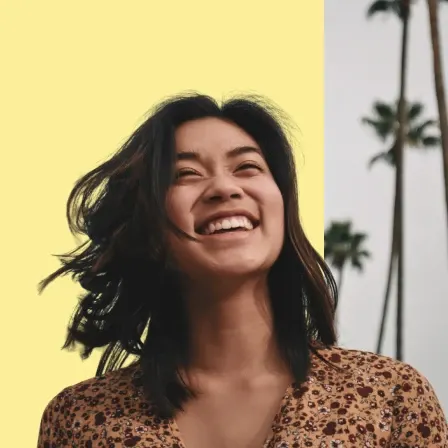

In [ ]:
#load and display
img_path = '/content/drive/MyDrive/images/remove_background_large.webp'
img = cv2.imread(img_path)
cv2_imshow(img)

In [ ]:
%whos

Variable     Type        Data/Info
----------------------------------
cv2          module      <module 'cv2' (<google.co<...>ject at 0x7ca2fd62baa0>)>
cv2_imshow   function    <function cv2_imshow at 0x7ca2e5bf6c00>
drive        module      <module 'google.colab.dri<...>s/google/colab/drive.py'>
files        module      <module 'google.colab.fil<...>s/google/colab/files.py'>
img          ndarray     448x448x3: 602112 elems, type `uint8`, 602112 bytes (588.0 kb)
img_path     str         /content/drive/MyDrive/im<...>ove_background_large.webp
np           module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt          module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
uploaded     dict        n=1


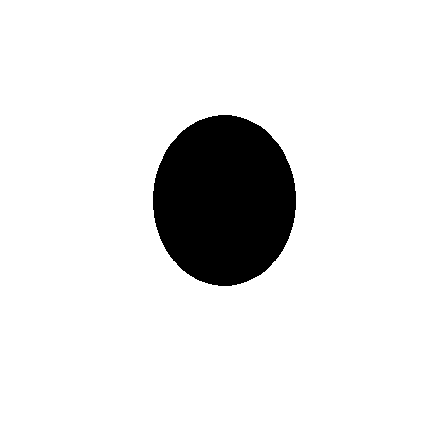

In [ ]:
h, w = img.shape[:2]

# Step 1: create a white mask
mask = np.ones((h, w), dtype=np.uint8) * 255   # white background

# Step 2: define ellipse parameters
center = (w // 2, 200)                      # center of ellipse
axes = (int(w * 0.16), int(h * 0.19))            # size of ellipse
angle = 0                                      # rotation

# Step 3: draw filled black ellipse
cv2.ellipse(mask, center, axes, angle, 0, 360, 0, -1)

# Step 4: optional — invert if you want opposite colors
# mask = cv2.bitwise_not(mask)

# Step 5: display
cv2_imshow(mask)

In [ ]:
print("Height:", h)
print("Width:", w)

Height: 448
Width: 448


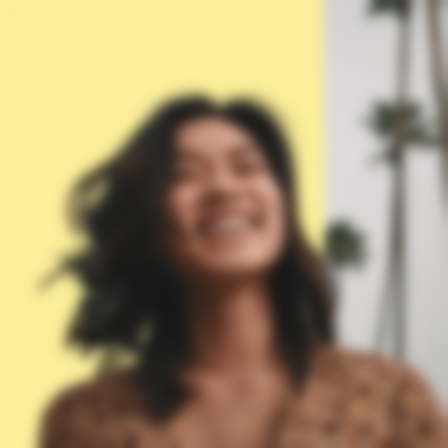

In [ ]:
# Apply heavy Gaussian blur
# The kernel size (e.g., (51, 51)) controls how strong the blur is — must be odd numbers
blurred = cv2.GaussianBlur(img, (39, 39), 0)

# Show the result
cv2_imshow(blurred)

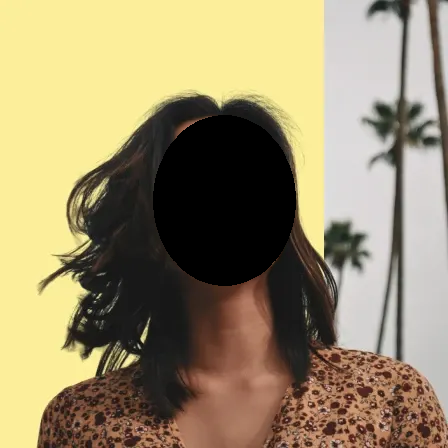

In [ ]:
# Extract the subject region using bitwise_and
sharp_subject = cv2.bitwise_and(img, img, mask=mask)

# Show the result
cv2_imshow(sharp_subject)

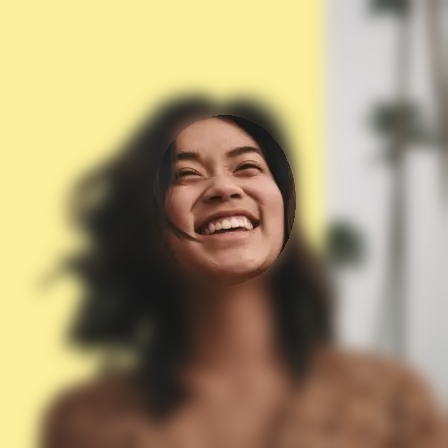

In [ ]:

# Create a blurred version of the entire image
blurred = cv2.GaussianBlur(img, (51, 51), 0)

# ✅ Extract only the blurred background (white = background in mask_inv)
blurred_background = cv2.bitwise_and(blurred, blurred, mask=mask)

# ✅ Extract the sharp subject from original image
sharp_subject = cv2.bitwise_and(img, img, mask=mask_inv)

# ✅ Combine them together
final_result = cv2.add(sharp_subject, blurred_background)

# Show result
cv2_imshow(final_result)